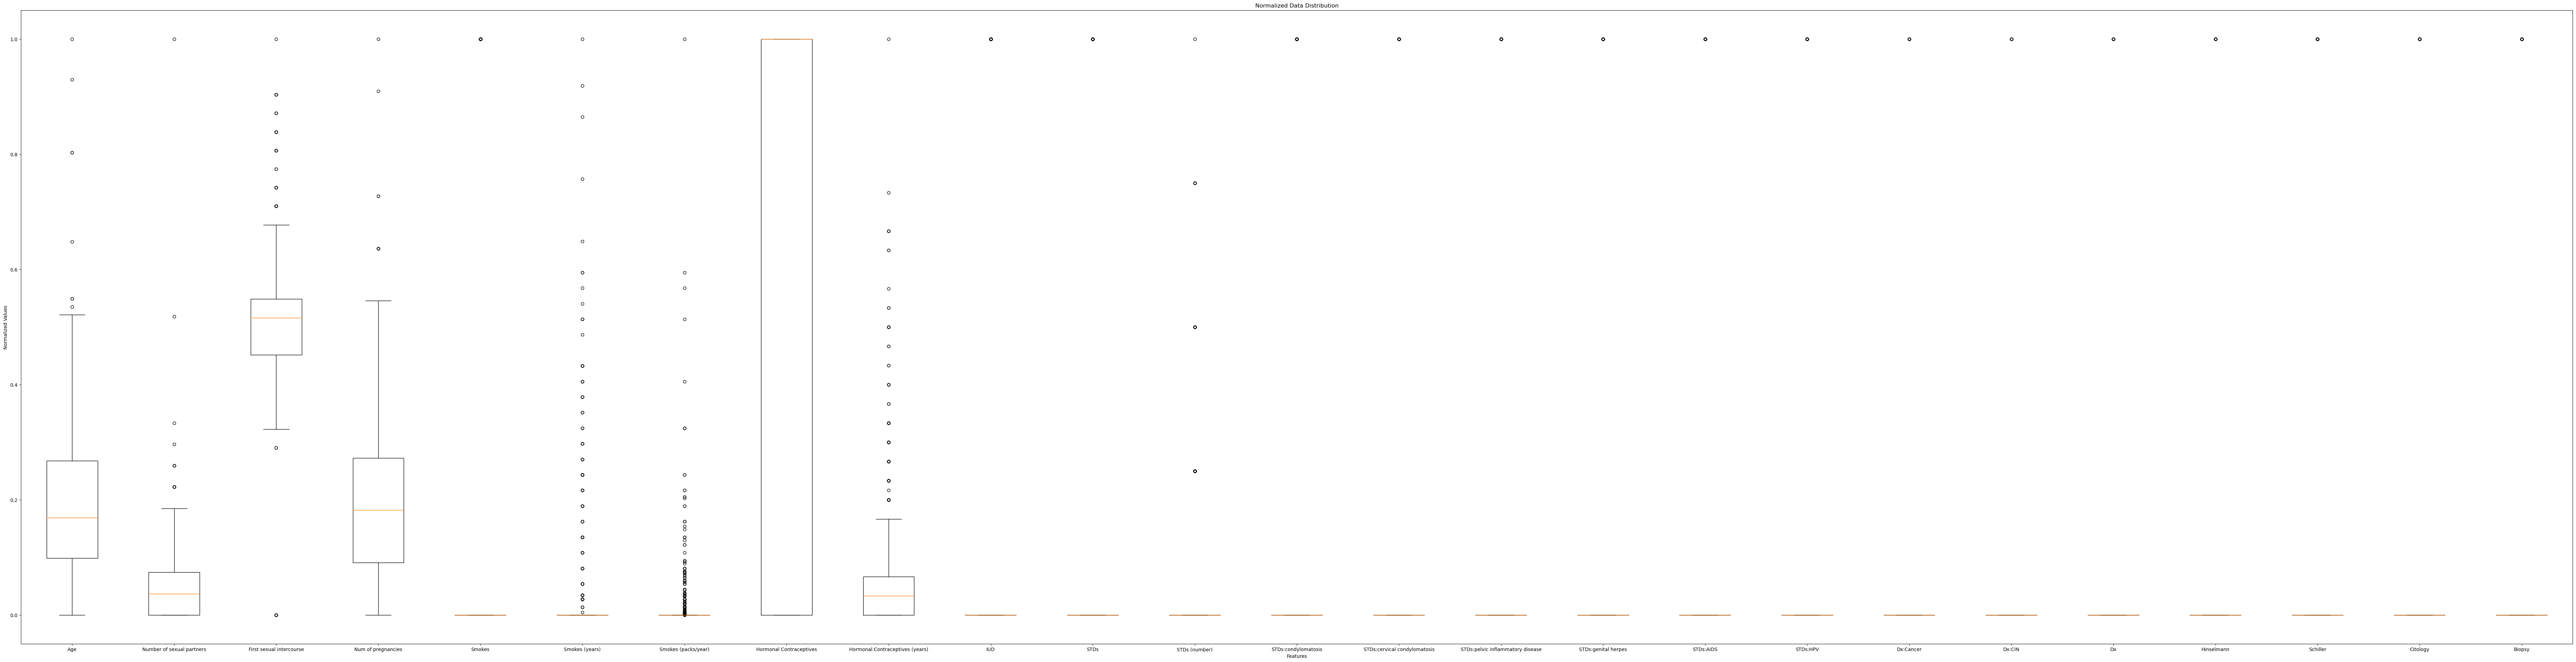

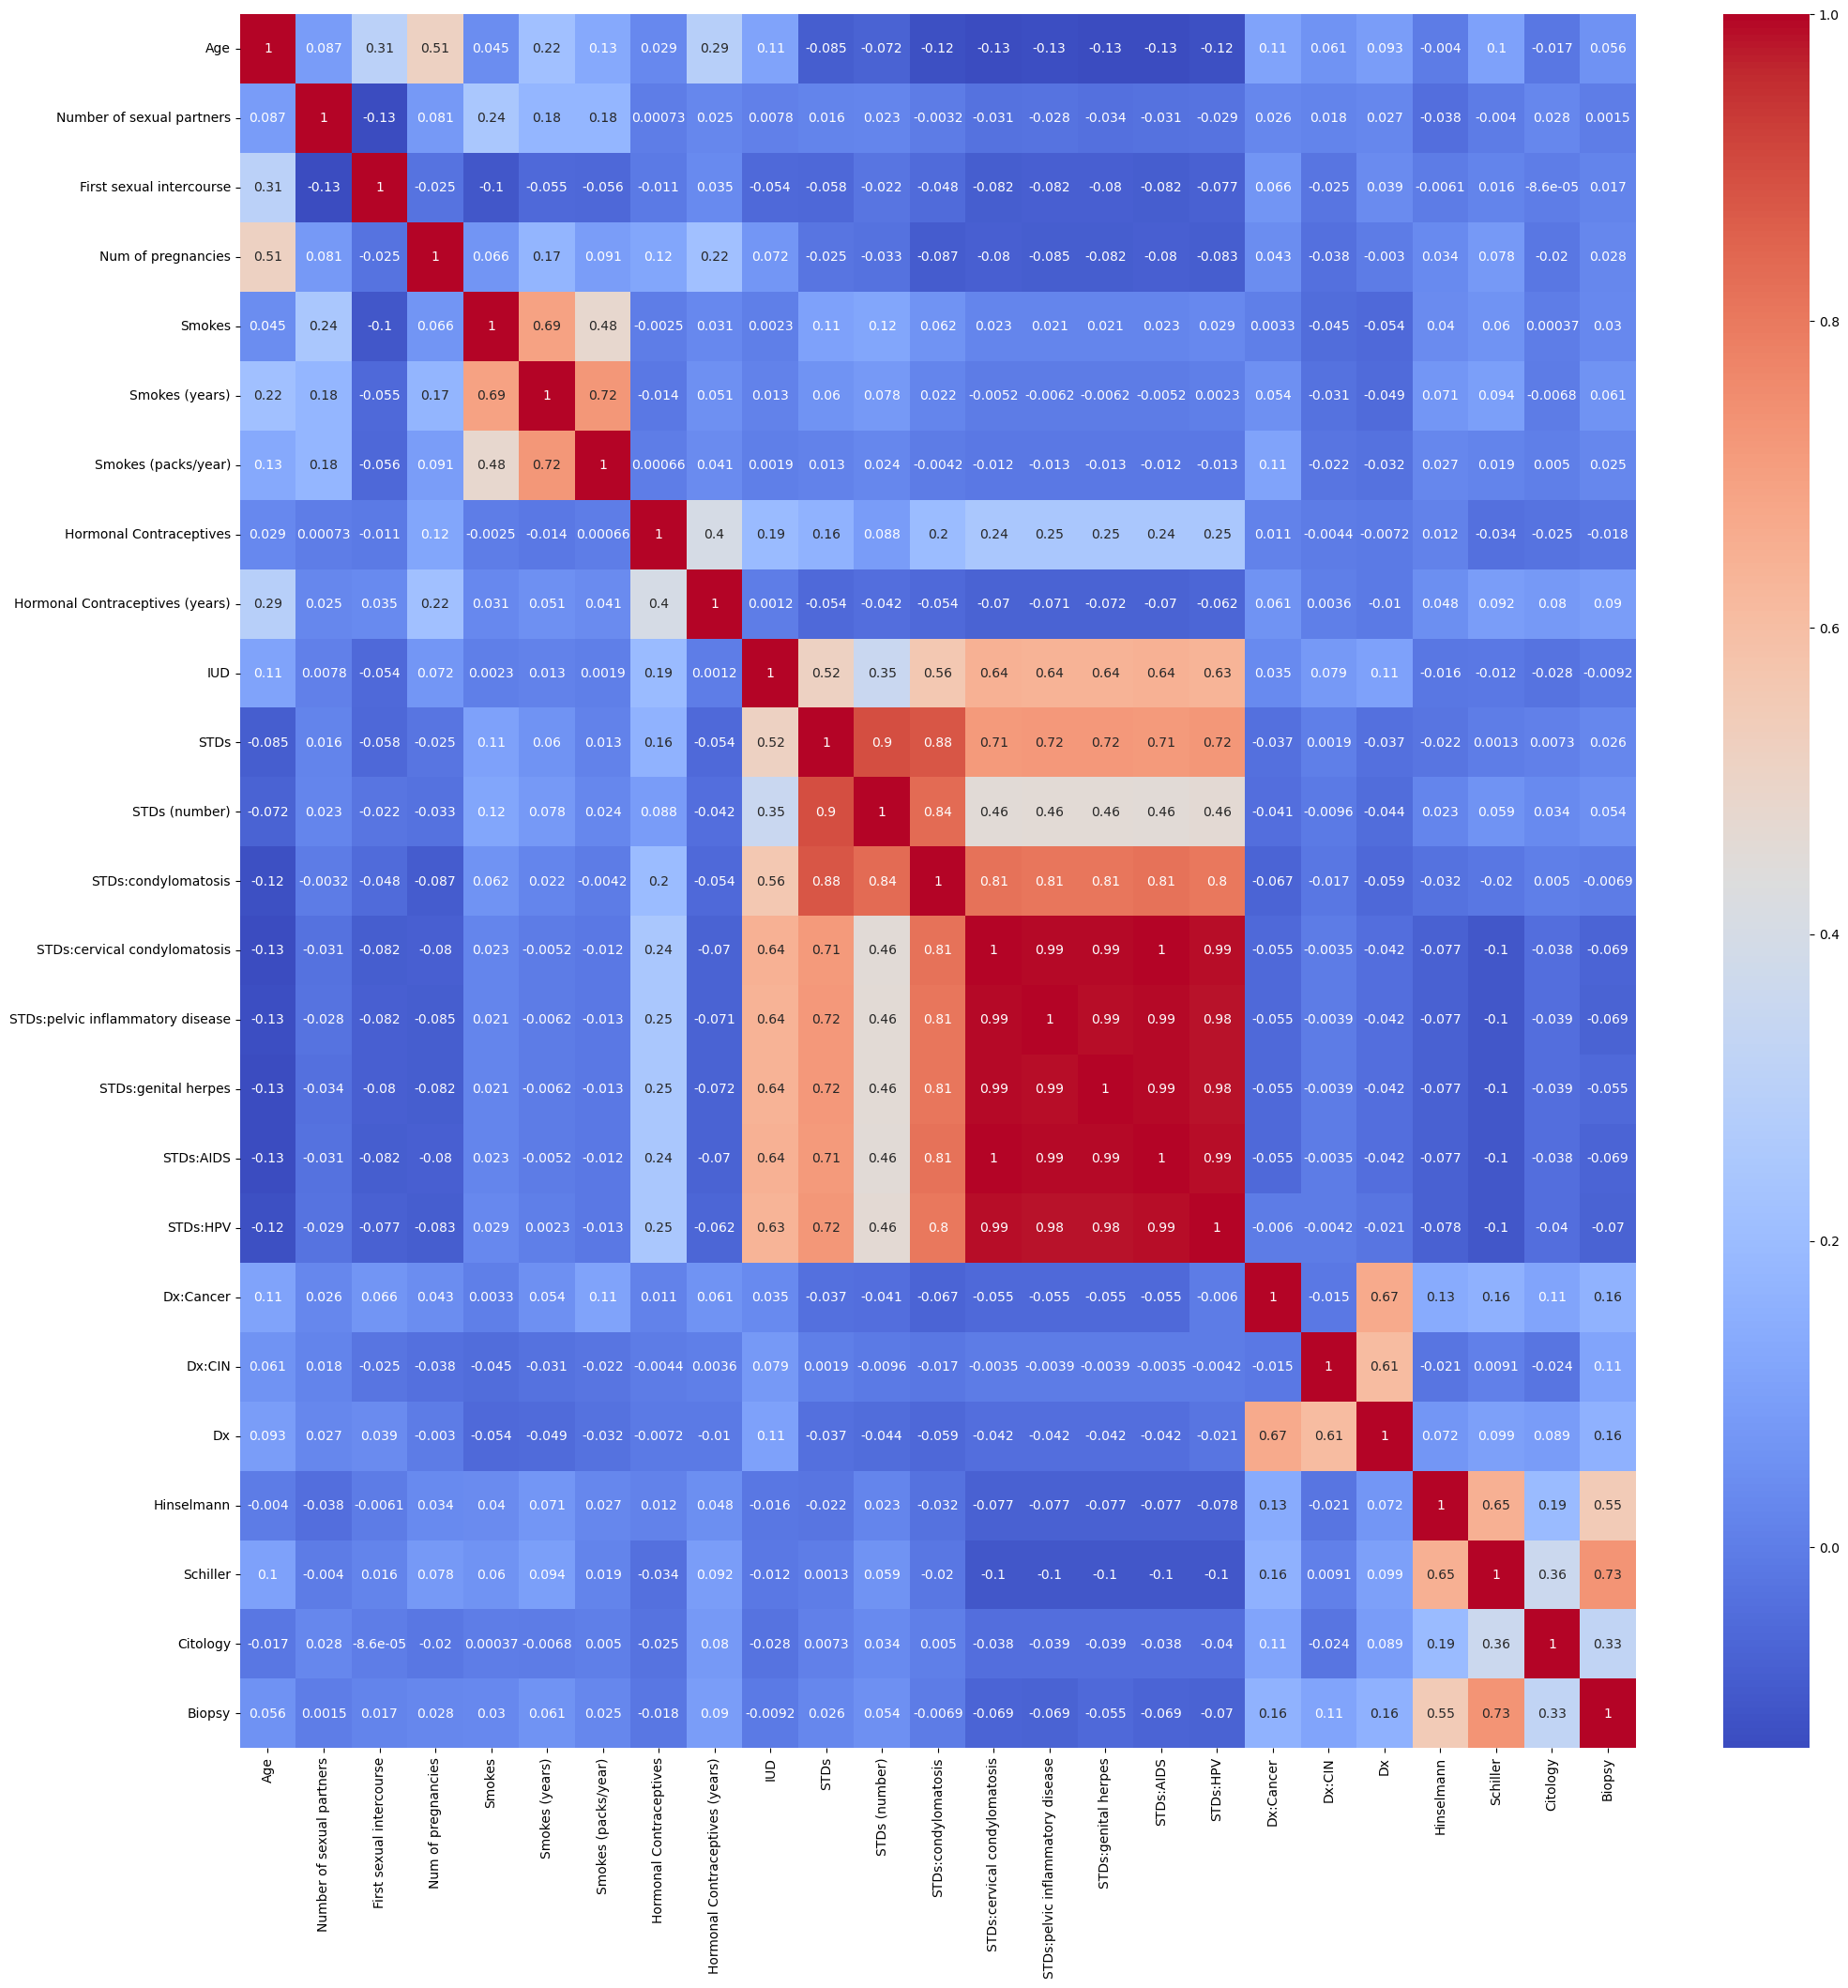

[['Classifier' 'Accuracy' 'Precision' 'Recall']
 ['SVM' '0.9534883720930233' '0.47674418604651164' '0.0']
 ['KNN' '0.9709302325581395' '0.8480519480519481' '0.625']]
[['Classifier' 'Accuracy' 'Precision' 'Recall']
 ['SVM' '0.9534883720930233' '0.9328063241106719' '0.5882352941176471']
 ['KNN' '0.9593023255813954' '0.9395833333333333' '0.6470588235294118']]
[['Classifier' 'Accuracy' 'Precision' 'Recall']
 ['SVM' '0.9709302325581395' '0.48546511627906974' '0.0']
 ['KNN' '0.9709302325581395' '0.7382352941176471' '0.2']]
[['Classifier' 'Accuracy' 'Precision' 'Recall']
 ['SVM' '0.9534883720930233' '0.8057594579333709' '0.6363636363636364']
 ['KNN' '0.9593023255813954' '0.8376543209876544' '0.6363636363636364']]
[[802  32]
 [ 21   3]]
[[766  68]
 [ 18   6]]
[[794  40]
 [ 20   4]]
[[786  48]
 [ 17   7]]


In [1]:
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Dealing with NaN values by replacing them by 1
df = pd.read_csv('kag_risk_factors_cervical_cancer.csv', na_values=['?'])
df.fillna(1, inplace=True)

# Normalization of each column
df['Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Number of sexual partners'] = (df['Number of sexual partners'] - df['Number of sexual partners'].min()) / (df['Number of sexual partners'].max() - df['Number of sexual partners'].min())
df['First sexual intercourse'] = (df['First sexual intercourse'] - df['First sexual intercourse'].min()) / (df['First sexual intercourse'].max() - df['First sexual intercourse'].min())
df['Num of pregnancies'] = (df['Num of pregnancies'] - df['Num of pregnancies'].min()) / (df['Num of pregnancies'].max() - df['Num of pregnancies'].min())
df['Smokes'] = (df['Smokes'] - df['Smokes'].min()) / (df['Smokes'].max() - df['Smokes'].min())
df['Smokes (years)'] = (df['Smokes (years)'] - df['Smokes (years)'].min()) / (df['Smokes (years)'].max() - df['Smokes (years)'].min())
df['Smokes (packs/year)'] = (df['Smokes (packs/year)'] - df['Smokes (packs/year)'].min()) / (df['Smokes (packs/year)'].max() - df['Smokes (packs/year)'].min())
df['Hormonal Contraceptives'] = (df['Hormonal Contraceptives'] - df['Hormonal Contraceptives'].min()) / (df['Hormonal Contraceptives'].max() - df['Hormonal Contraceptives'].min())
df['Hormonal Contraceptives (years)'] = (df['Hormonal Contraceptives (years)'] - df['Hormonal Contraceptives (years)'].min()) / (df['Hormonal Contraceptives (years)'].max() - df['Hormonal Contraceptives (years)'].min())
df['IUD'] = (df['IUD'] - df['IUD'].min()) / (df['IUD'].max() - df['IUD'].min())
df['IUD (years)'] = (df['IUD (years)'] - df['IUD (years)'].min()) / (df['IUD (years)'].max() - df['IUD (years)'].min())
df['STDs'] = (df['STDs'] - df['STDs'].min()) / (df['STDs'].max() - df['STDs'].min())
df['STDs (number)'] = (df['STDs (number)'] - df['STDs (number)'].min()) / (df['STDs (number)'].max() - df['STDs (number)'].min())
df['STDs:condylomatosis'] = (df['STDs:condylomatosis'] - df['STDs:condylomatosis'].min()) / (df['STDs:condylomatosis'].max() - df['STDs:condylomatosis'].min())
df['STDs:cervical condylomatosis'] = (df['STDs:cervical condylomatosis'] - df['STDs:cervical condylomatosis'].min()) / (df['STDs:cervical condylomatosis'].max() - df['STDs:cervical condylomatosis'].min())
df['STDs:vaginal condylomatosis'] = (df['STDs:vaginal condylomatosis'] - df['STDs:vaginal condylomatosis'].min()) / (df['STDs:vaginal condylomatosis'].max() - df['STDs:vaginal condylomatosis'].min())
df['STDs:vulvo-perineal condylomatosis'] = (df['STDs:vulvo-perineal condylomatosis'] - df['STDs:vulvo-perineal condylomatosis'].min()) / (df['STDs:vulvo-perineal condylomatosis'].max() - df['STDs:vulvo-perineal condylomatosis'].min())
df['STDs:syphilis'] = (df['STDs:syphilis'] - df['STDs:syphilis'].min()) / (df['STDs:syphilis'].max() - df['STDs:syphilis'].min())
df['STDs:pelvic inflammatory disease'] = (df['STDs:pelvic inflammatory disease'] - df['STDs:pelvic inflammatory disease'].min()) / (df['STDs:pelvic inflammatory disease'].max() - df['STDs:pelvic inflammatory disease'].min())
df['STDs:genital herpes'] = (df['STDs:genital herpes'] - df['STDs:genital herpes'].min()) / (df['STDs:genital herpes'].max() - df['STDs:genital herpes'].min())
df['STDs:molluscum contagiosum'] = (df['STDs:molluscum contagiosum'] - df['STDs:molluscum contagiosum'].min()) / (df['STDs:molluscum contagiosum'].max() - df['STDs:molluscum contagiosum'].min())
df['STDs:AIDS'] = (df['STDs:AIDS'] - df['STDs:AIDS'].min()) / (df['STDs:AIDS'].max() - df['STDs:AIDS'].min())
df['STDs:HIV'] = (df['STDs:HIV'] - df['STDs:HIV'].min()) / (df['STDs:HIV'].max() - df['STDs:HIV'].min())
df['STDs:Hepatitis B'] = (df['STDs:Hepatitis B'] - df['STDs:Hepatitis B'].min()) / (df['STDs:Hepatitis B'].max() - df['STDs:Hepatitis B'].min())
df['STDs:HPV'] = (df['STDs:HPV'] - df['STDs:HPV'].min()) / (df['STDs:HPV'].max() - df['STDs:HPV'].min())
df['STDs: Number of diagnosis'] = (df['STDs: Number of diagnosis'] - df['STDs: Number of diagnosis'].min()) / (df['STDs: Number of diagnosis'].max() - df['STDs: Number of diagnosis'].min())
df['STDs: Time since first diagnosis'] = (df['STDs: Time since first diagnosis'] - df['STDs: Time since first diagnosis'].min()) / (df['STDs: Time since first diagnosis'].max() - df['STDs: Time since first diagnosis'].min())
df['STDs: Time since last diagnosis'] = (df['STDs: Time since last diagnosis'] - df['STDs: Time since last diagnosis'].min()) / (df['STDs: Time since last diagnosis'].max() - df['STDs: Time since last diagnosis'].min())
df['Dx:Cancer'] = (df['Dx:Cancer'] - df['Dx:Cancer'].min()) / (df['Dx:Cancer'].max() - df['Dx:Cancer'].min())
df['Dx:CIN'] = (df['Dx:CIN'] - df['Dx:CIN'].min()) / (df['Dx:CIN'].max() - df['Dx:CIN'].min())
df['Dx:HPV'] = (df['Dx:HPV'] - df['Dx:HPV'].min()) / (df['Dx:HPV'].max() - df['Dx:HPV'].min())
df['Dx'] = (df['Dx'] - df['Dx'].min()) / (df['Dx'].max() - df['Dx'].min())
df['Hinselmann'] = (df['Hinselmann'] - df['Hinselmann'].min()) / (df['Hinselmann'].max() - df['Hinselmann'].min())
df['Schiller'] = (df['Schiller'] - df['Schiller'].min()) / (df['Schiller'].max() - df['Schiller'].min())
df['Citology'] = (df['Citology'] - df['Citology'].min()) / (df['Citology'].max() - df['Citology'].min())
df['Biopsy'] = (df['Biopsy'] - df['Biopsy'].min()) / (df['Biopsy'].max() - df['Biopsy'].min())

# Elimination of redundant features using PCA
X = df.drop([], axis=1)
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X)
loadings = pd.DataFrame(pca.components_.T, columns=['PC1', 'PC2'], index=X.columns)
X_reduced = X.drop(['IUD (years)','STDs:vaginal condylomatosis','STDs:vulvo-perineal condylomatosis','STDs:syphilis','STDs:molluscum contagiosum','STDs:HIV','STDs:Hepatitis B','STDs: Number of diagnosis','STDs: Time since first diagnosis','STDs: Time since last diagnosis','Dx:HPV'], axis=1)
df=X_reduced

# Visualization of the normalized data distribution using boxplot
plt.figure(figsize=(96, 24))
plt.boxplot(df.values, labels=df.columns)
plt.title('Normalized Data Distribution')
plt.xlabel('Features')
plt.ylabel('Normalized Values')
plt.show()
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(24, 24))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', ax=ax)
plt.show()

# Conversion of each data to 0 and 1 according to the threshold
threshold = 0.5
for column in df.columns:
 df[column] = df[column].apply(lambda x: 1 if x > threshold else 0)

# Transferred the new data to the new file
data=pd.read_csv('kag_risk_factors_cervical_cancer_modified.csv')

# Classification of the target variable Hinselmann using the SVM and the KNN classifiers
X = data.drop('Hinselmann', axis=1)
y = data['Hinselmann']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm,average='macro', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn,average='macro', zero_division=0)
knn_recall = recall_score(y_test, y_pred_knn)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
svm_params = {'C': [0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
knn_pred = knn_best.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
svm_best_pred = svm_best.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_pred)
knn_best_pred = knn_best.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_pred)
svm_best = SVC(C=1.0, kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=5)
svm_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)
svm_score = svm_best.score(X_test, y_test)
knn_score = knn_best.score(X_test, y_test)

# Prints the table for the evaluation matrix
values = [["SVM", svm_accuracy, svm_precision, svm_recall], 
        ["KNN", knn_accuracy, knn_precision, knn_recall]]
headers = ["Classifier", "Accuracy", "Precision", "Recall"]
table = np.array([headers] + values)
print(table)

# Classification of the target variable Schiller using the SVM and the KNN classifiers
X = data.drop('Schiller', axis=1)
y = data['Schiller']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm,average='macro', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn,average='macro', zero_division=0)
knn_recall = recall_score(y_test, y_pred_knn)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
svm_params = {'C': [0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
knn_pred = knn_best.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
svm_best_pred = svm_best.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_pred)
knn_best_pred = knn_best.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_pred)
svm_best = SVC(C=1.0, kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=5)
svm_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)
svm_score = svm_best.score(X_test, y_test)
knn_score = knn_best.score(X_test, y_test)

# Prints the table for the evaluation matrix
values = [["SVM", svm_accuracy, svm_precision, svm_recall], 
        ["KNN", knn_accuracy, knn_precision, knn_recall]]
headers = ["Classifier", "Accuracy", "Precision", "Recall"]
table = np.array([headers] + values)
print(table)

# Classification of the target variable Citology using the SVM and the KNN classifiers
X = data.drop('Citology', axis=1)
y = data['Citology']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm,average='macro', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn,average='macro', zero_division=0)
knn_recall = recall_score(y_test, y_pred_knn)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
svm_params = {'C': [0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
knn_pred = knn_best.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
svm_best_pred = svm_best.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_pred)
knn_best_pred = knn_best.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_pred)
svm_best = SVC(C=1.0, kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=5)
svm_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)
svm_score = svm_best.score(X_test, y_test)
knn_score = knn_best.score(X_test, y_test)

# Prints the table for the evaluation matrix
values = [["SVM", svm_accuracy, svm_precision, svm_recall], 
        ["KNN", knn_accuracy, knn_precision, knn_recall]]
headers = ["Classifier", "Accuracy", "Precision", "Recall"]
table = np.array([headers] + values)
print(table)

# Classification of the target variable Biopsy using the SVM and the KNN classifiers
X = data.drop('Biopsy', axis=1)
y = data['Biopsy']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred,average='macro', zero_division=0)
recall = recall_score(y_val, y_pred)
y_pred_svm = svm.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_precision = precision_score(y_test, y_pred_svm,average='macro', zero_division=0)
svm_recall = recall_score(y_test, y_pred_svm)
y_pred_knn = knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, y_pred_knn)
knn_precision = precision_score(y_test, y_pred_knn,average='macro', zero_division=0)
knn_recall = recall_score(y_test, y_pred_knn)
svm = SVC(kernel='linear')
knn = KNeighborsClassifier()
svm_params = {'C': [0.1, 1, 10, 100]}
knn_params = {'n_neighbors': [3, 5, 7, 9]}
svm_grid = GridSearchCV(svm, svm_params, cv=5)
svm_grid.fit(X_train, y_train)
svm_best = svm_grid.best_estimator_
knn_grid = GridSearchCV(knn, knn_params, cv=5)
knn_grid.fit(X_train, y_train)
knn_best = knn_grid.best_estimator_
svm_pred = svm_best.predict(X_test)
svm_acc = accuracy_score(y_test, svm_pred)
knn_pred = knn_best.predict(X_test)
knn_acc = accuracy_score(y_test, knn_pred)
svm_best_pred = svm_best.predict(X_test)
svm_best_acc = accuracy_score(y_test, svm_best_pred)
knn_best_pred = knn_best.predict(X_test)
knn_best_acc = accuracy_score(y_test, knn_best_pred)
svm_best = SVC(C=1.0, kernel='linear')
knn_best = KNeighborsClassifier(n_neighbors=5)
svm_best.fit(X_train, y_train)
knn_best.fit(X_train, y_train)
svm_score = svm_best.score(X_test, y_test)
knn_score = knn_best.score(X_test, y_test)

# Prints the table for the evaluation matrix
values = [["SVM", svm_accuracy, svm_precision, svm_recall], 
        ["KNN", knn_accuracy, knn_precision, knn_recall]]
headers = ["Classifier", "Accuracy", "Precision", "Recall"]
table = np.array([headers] + values)
print(table)

# Reads the modified file to the data variable
data=pd.read_csv('kag_risk_factors_cervical_cancer_modified.csv')

# Plots the confusion matrix for the target variable Hinselmann
y_true=data['Dx'].values
y_pred=data['Hinselmann'].values
cm=confusion_matrix(y_true,y_pred)
print(cm)

# Plots the confusion matrix for the target variable Schiller
y_true=data['Dx'].values
y_pred=data['Schiller'].values
cm=confusion_matrix(y_true,y_pred)
print(cm)

# Plots the confusion matrix for the target variable Citology
y_true=data['Dx'].values
y_pred=data['Citology'].values
cm=confusion_matrix(y_true,y_pred)
print(cm)

# Plots the confusion matrix for the target variable Biopsy
y_true=data['Dx'].values
y_pred=data['Biopsy'].values
cm=confusion_matrix(y_true,y_pred)
print(cm)
